### Install library to import dicom imaging files.

In [1]:
pip install pydicom

Note: you may need to restart the kernel to use updated packages.


### Import required library.

In [2]:
import pandas as pd
import numpy as np
import os
import pydicom
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# specify your image path
image_path1 = 'C:/Users/Achyut Pratap/JupyterCode/Capstone Project - Healthcare Imaging/cancerimagingarchive/COVID-19-AR-16406489/1-1.dcm'
ds = pydicom.dcmread(image_path1)
medical_image = pydicom.read_file(image_path1)
print(medical_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.9999.103.2710019309218103448268301702692
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: Digital X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.9999.103.27100193092181034

In [13]:
# specify your image path
image_path = 'C:/Users/Achyut Pratap/JupyterCode/Capstone Project - Healthcare Imaging/cancerimagingarchive/COVID-19-AR-16406489'

In [28]:
dicom_atts = ["SpecificCharacterSet","ImageType","SOPInstanceUID","Modality","Manufacturer","ManufacturerModelName","PatientName","PatientID",
             "PatientsSex","DeidentificationMethod","BodyPartExamined","SliceThickness","KVP","SpacingBetweenSlices","DistanceSourceToDetector","DistanceSourceToPatient","GantryDetectorTilt",
             "TableHeight","RotationDirection","XRayTubeCurrent","GeneratorPower","FocalSpots","ConvolutionKernel","PatientPosition","RevolutionTime","SingleCollimationWidth","TotalCollimationWidth","TableSpeed","TableFeedPerRotation","SpiralPitchFactor",
              "StudyInstanceUID","SeriesInstanceUID","StudyID","InstanceNumber","PatientOrientation","ImagePositionPatient","ImageOrientationPatient","FrameOfReferenceUID","PositionReferenceIndicator","SliceLocation","SamplesPerPixel","PhotometricInterpretation",
             "Rows","Columns","PixelSpacing","BitsAllocated","BitsStored","HighBit","PixelRepresentation","PixelPaddingValue","WindowCenter","WindowWidth","RescaleIntercept","RescaleSlope","RescaleType"]

list_attributes = ["ImageType","ImagePositionPatient","ImageOrientationPatient","PixelSpacing"]

def Metadata_for_Patient(folder_path):
    files = os.listdir(folder_path)
    patient_id = folder_path.split('/')[-1]
    
    ## Each row is an image file:
    base_data = {'Patient': [patient_id]*len(files), 'File': files}
    patient_df = pd.DataFrame(data=base_data)
    
    ## Add Columns by looping through DICOM attributes for each image file:
    slices = [pydicom.dcmread(folder_path + '/' + s) for s in files] 
    for d in dicom_atts:
        attribute_i = []
        for s in slices:
            try:
                attribute_i.append(s[d].value)
            except:
                attribute_i.append(np.nan)
        patient_df[d] = attribute_i
        
    ## Store min pixel value for each image file 
    attribute_min_pixel = []
    for s in slices:
        try:
            mp = np.min(s.pixel_array.astype(np.int16).flatten())
        except:
            mp = np.nan
        attribute_min_pixel.append(mp)
    patient_df["MinPixelValue"] = attribute_min_pixel
  
    return patient_df

In [30]:
Metadata_for_Patient(image_path).head()

,Patient,File,SpecificCharacterSet,ImageType,SOPInstanceUID,Modality,Manufacturer,ManufacturerModelName,PatientName,PatientID,...,BitsStored,HighBit,PixelRepresentation,PixelPaddingValue,WindowCenter,WindowWidth,RescaleIntercept,RescaleSlope,RescaleType,MinPixelValue
0,COVID-19-AR-16406489,1-02.dcm,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL]",1.3.6.1.4.1.14519.5.2.1.4320.5030.166877052044...,CT,GE MEDICAL SYSTEMS,LightSpeed16,"(R, _, 0, 0, 4)",R_004,...,16,15,1,-2000.0,-670.0,1225.0,-1024.0,1.0,HU,-2000
1,COVID-19-AR-16406489,1-03.dcm,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL]",1.3.6.1.4.1.14519.5.2.1.4320.5030.234447019833...,CT,GE MEDICAL SYSTEMS,LightSpeed16,"(R, _, 0, 0, 4)",R_004,...,16,15,1,-2000.0,-670.0,1225.0,-1024.0,1.0,HU,-2000
2,COVID-19-AR-16406489,1-04.dcm,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL]",1.3.6.1.4.1.14519.5.2.1.4320.5030.119563062554...,CT,GE MEDICAL SYSTEMS,LightSpeed16,"(R, _, 0, 0, 4)",R_004,...,16,15,1,-2000.0,-670.0,1225.0,-1024.0,1.0,HU,-2000
3,COVID-19-AR-16406489,1-05.dcm,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL]",1.3.6.1.4.1.14519.5.2.1.4320.5030.387037371226...,CT,GE MEDICAL SYSTEMS,LightSpeed16,"(R, _, 0, 0, 4)",R_004,...,16,15,1,-2000.0,-670.0,1225.0,-1024.0,1.0,HU,-2000
4,COVID-19-AR-16406489,1-06.dcm,ISO_IR 100,"[ORIGINAL, PRIMARY, AXIAL]",1.3.6.1.4.1.14519.5.2.1.4320.5030.309885219776...,CT,GE MEDICAL SYSTEMS,LightSpeed16,"(R, _, 0, 0, 4)",R_004,...,16,15,1,-2000.0,-670.0,1225.0,-1024.0,1.0,HU,-2000


tr=pd.read_csv('C:/Users/Achyut Pratap/JupyterCode/Capstone Project - Healthcare Imaging/cancerimagingarchive/COVID-19-AR/DicomTages.csv', sep = '|')
tr

In [32]:
image = medical_image.pixel_array
print(image.shape)

(2965, 2729)


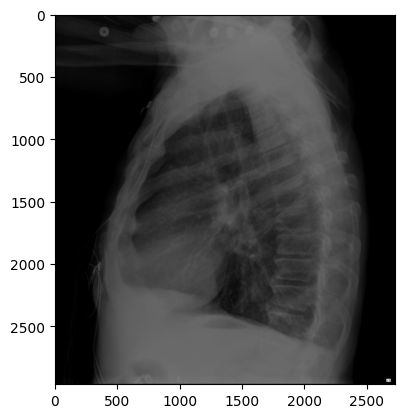

In [33]:
plt.imshow(image, cmap='gray')

In [34]:
print(image.min())
print(image.max())

0
8191


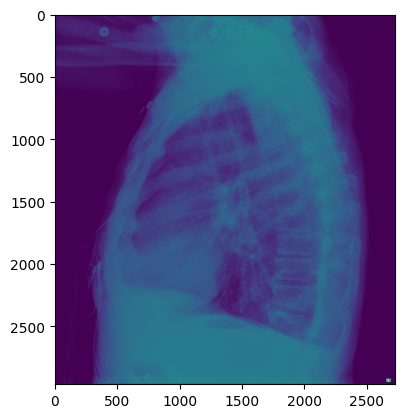

In [38]:
ds = pydicom.dcmread(image_path1)
plt.imshow(ds.pixel_array)

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [44]:
model = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes' : [(32,32), (64,64), (128,128)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver' : ['sgd', 'adam'],
    'max_iter' : [300,400,500],
    'batch_size' : [64,128],
    'random_state': [1,2,3]
}

chk = GridSearchCV(model, parameter_space, n_jobs=-1)


In [ ]:
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

In [52]:
# Import the Keras libraries required : 
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [53]:
import pandas as pd
cli = pd.read_excel('C:/Users/Achyut Pratap/JupyterCode/Capstone Project - Healthcare Imaging/cancerimagingarchive/COVID-19-AR/COVID-19 AR Clinical Correlates July202020.xlsx', header = 1, sheet_name = 'Patient Data')
cli

,PATIENT_ID,AGE,SEX,RACE,ZIP,LATEST_BMI,LATEST WEIGHT,LATEST HEIGHT,TUBERCULOSIS,SYSTEMIC LUPUS ERYTHMATOSUS,...,DIABETES TYPE II,TRANSPLANT,HEMODIALYSIS Pre Diagnosis,HEMODIALYSIS Post diagnosis,CANCER,COVID TEST POSITIVE,TEST NAME,ICU Admit,# ICU admits,MORTALITY
0,COVID-19-AR-16434409,51,M,BLACK OR AFRICAN AMERICAN,722,37.70,207.0,"5' 4""",0,0,...,1,0,0,0,0,1,SARS-CoV-2 (COVID-19),0,0,0
1,COVID-19-AR-16434381,44,F,BLACK OR AFRICAN AMERICAN,721,64.60,412.0,"5' 7""",0,0,...,0,0,0,0,0,1,NaN,0,0,0
2,COVID-19-AR-16406513,44,M,BLACK OR AFRICAN AMERICAN,722,33.30,190.0,"5' 5""",0,0,...,0,0,0,0,0,1,Misc Test: covid-19,1,1,0
3,COVID-19-AR-16439216,61,F,BLACK OR AFRICAN AMERICAN,722,36.00,210.0,"5' 4""",0,0,...,1,0,0,0,1,1,NaN,0,0,0
4,COVID-19-AR-16406491,49,F,BLACK OR AFRICAN AMERICAN,721,43.85,280.0,"5' 7""",0,0,...,1,0,0,0,0,1,SARS-CoV-2 (COVID-19),0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,COVID-19-AR-16434383,57,M,OTHER,722,29.20,171.0,"5' 8""",0,0,...,0,0,0,0,0,1,SARS-CoV-2 (COVID-19),1,1,0
101,COVID-19-AR-16439200,41,M,WHITE,716,29.10,208.0,"5' 11""",0,0,...,0,0,0,0,0,1,SARS-CoV-2 (COVID-19),0,0,0
102,COVID-19-AR-16439190,39,F,OTHER,728,34.54,195.0,"5' 3""",0,0,...,0,0,0,0,0,1,SARS-CoV-2 (COVID-19),0,0,0
103,COVID-19-AR-16445122,29,F,BLACK OR AFRICAN AMERICAN,721,32.90,219.0,"5' 8""",0,0,...,0,0,0,0,0,1,SARS-CoV-2 (COVID-19),1,1,0


In [54]:
cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PATIENT_ID                   105 non-null    object 
 1   AGE                          105 non-null    int64  
 2   SEX                          105 non-null    object 
 3   RACE                         105 non-null    object 
 4   ZIP                          105 non-null    int64  
 5   LATEST_BMI                   104 non-null    float64
 6   LATEST WEIGHT                104 non-null    float64
 7   LATEST HEIGHT                104 non-null    object 
 8   TUBERCULOSIS                 105 non-null    int64  
 9   SYSTEMIC LUPUS ERYTHMATOSUS  105 non-null    int64  
 10  RHEUMATOID ARTHRITIS         105 non-null    int64  
 11  EXTENSIVE BURNS              105 non-null    int64  
 12  ASPLENIA                     105 non-null    int64  
 13  HYPOSPLENIA         

In [55]:
cli.describe()

,AGE,ZIP,LATEST_BMI,LATEST WEIGHT,TUBERCULOSIS,SYSTEMIC LUPUS ERYTHMATOSUS,RHEUMATOID ARTHRITIS,EXTENSIVE BURNS,ASPLENIA,HYPOSPLENIA,...,DIABETES TYPE I,DIABETES TYPE II,TRANSPLANT,HEMODIALYSIS Pre Diagnosis,HEMODIALYSIS Post diagnosis,CANCER,COVID TEST POSITIVE,ICU Admit,# ICU admits,MORTALITY
count,105.000000,105.000000,104.000000,104.000000,105.0,105.0,105.0,105.000000,105.0,105.0,...,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.0,105.000000,105.000000,105.000000
mean,54.371429,720.438095,33.071154,212.317308,0.0,0.0,0.0,0.019048,0.0,0.0,...,0.019048,0.190476,0.028571,0.028571,0.057143,0.238095,1.0,0.276190,0.342857,0.095238
std,17.904263,2.522681,9.461226,64.545350,0.0,0.0,0.0,0.137348,0.0,0.0,...,0.137348,0.394560,0.167398,0.167398,0.233229,0.427960,0.0,0.449257,0.662579,0.294951
min,19.000000,712.000000,18.700000,105.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,40.000000,720.000000,27.035000,170.750000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,55.000000,721.000000,31.610000,201.500000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
75%,67.000000,722.000000,37.725000,232.750000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000
max,91.000000,729.000000,64.900000,412.000000,0.0,0.0,0.0,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,4.000000,1.000000


In [56]:
# Replace 'male' and 'female' to 0 and 1 respecively value for Sex variable
cli['SEX'] = cli['SEX'].str.replace('F','1')
cli['SEX'] = cli['SEX'].str.replace('M','0').astype(int)
cli.head()

,PATIENT_ID,AGE,SEX,RACE,ZIP,LATEST_BMI,LATEST WEIGHT,LATEST HEIGHT,TUBERCULOSIS,SYSTEMIC LUPUS ERYTHMATOSUS,...,DIABETES TYPE II,TRANSPLANT,HEMODIALYSIS Pre Diagnosis,HEMODIALYSIS Post diagnosis,CANCER,COVID TEST POSITIVE,TEST NAME,ICU Admit,# ICU admits,MORTALITY
0,COVID-19-AR-16434409,51,0,BLACK OR AFRICAN AMERICAN,722,37.70,207.0,"5' 4""",0,0,...,1,0,0,0,0,1,SARS-CoV-2 (COVID-19),0,0,0
1,COVID-19-AR-16434381,44,1,BLACK OR AFRICAN AMERICAN,721,64.60,412.0,"5' 7""",0,0,...,0,0,0,0,0,1,NaN,0,0,0
2,COVID-19-AR-16406513,44,0,BLACK OR AFRICAN AMERICAN,722,33.30,190.0,"5' 5""",0,0,...,0,0,0,0,0,1,Misc Test: covid-19,1,1,0
3,COVID-19-AR-16439216,61,1,BLACK OR AFRICAN AMERICAN,722,36.00,210.0,"5' 4""",0,0,...,1,0,0,0,1,1,NaN,0,0,0
4,COVID-19-AR-16406491,49,1,BLACK OR AFRICAN AMERICAN,721,43.85,280.0,"5' 7""",0,0,...,1,0,0,0,0,1,SARS-CoV-2 (COVID-19),0,0,0


In [57]:
print(cli.nunique())

PATIENT_ID                     105
AGE                             53
SEX                              2
RACE                             5
ZIP                             12
LATEST_BMI                      94
LATEST WEIGHT                   74
LATEST HEIGHT                   18
TUBERCULOSIS                     1
SYSTEMIC LUPUS ERYTHMATOSUS      1
RHEUMATOID ARTHRITIS             1
EXTENSIVE BURNS                  2
ASPLENIA                         1
HYPOSPLENIA                      1
MEASLES                          1
CYTOMEGALOVIRUS                  1
CHICKEN POX                      1
HERPES ZOSTER                    1
MALNUTRITION                     2
CURRENT PREGNANT                 2
CHRONIC KIDNEY DISEASE           2
DIABETES TYPE I                  2
DIABETES TYPE II                 2
TRANSPLANT                       2
HEMODIALYSIS Pre Diagnosis       2
HEMODIALYSIS Post diagnosis      2
CANCER                           2
COVID TEST POSITIVE              1
TEST NAME           

In [58]:
cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PATIENT_ID                   105 non-null    object 
 1   AGE                          105 non-null    int64  
 2   SEX                          105 non-null    int32  
 3   RACE                         105 non-null    object 
 4   ZIP                          105 non-null    int64  
 5   LATEST_BMI                   104 non-null    float64
 6   LATEST WEIGHT                104 non-null    float64
 7   LATEST HEIGHT                104 non-null    object 
 8   TUBERCULOSIS                 105 non-null    int64  
 9   SYSTEMIC LUPUS ERYTHMATOSUS  105 non-null    int64  
 10  RHEUMATOID ARTHRITIS         105 non-null    int64  
 11  EXTENSIVE BURNS              105 non-null    int64  
 12  ASPLENIA                     105 non-null    int64  
 13  HYPOSPLENIA         

In [59]:
# split into input (X) and output (y) variables
X = cli.iloc[:, [1,2,11,18,19,20,21,22,23,24,25,26,27,29,30]]
y = cli.iloc[:, 31]

In [60]:
# Import the Keras libraries required : 
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
# define the keras model
model = Sequential()

model.add(Dense(10, input_shape=(15,), activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [62]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
# fit the keras model on the dataset
model.fit(X, y, epochs=5)

Epoch 1/5
4/4 [==============================] - 0s 4ms/step - loss: 0.3537 - accuracy: 0.9048
Epoch 2/5
4/4 [==============================] - 0s 5ms/step - loss: 0.3527 - accuracy: 0.9048
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 0.3518 - accuracy: 0.9048
Epoch 4/5
4/4 [==============================] - 0s 5ms/step - loss: 0.3503 - accuracy: 0.9048
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 0.3494 - accuracy: 0.9048


In [66]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.9048
Accuracy: 90.48
